In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report ,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# problem 1

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly

In [275]:
bank_df = pd.read_csv("bank_marketing_part1_Data.csv")

In [276]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [277]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [278]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [178]:
bank_customer_Segment= sv.analyze(bank_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [272]:
bcs=bank_customer_Segment.show_html('Bank_Customer_Segment.html')
bcs

Report Bank_Customer_Segment.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [279]:
print("Number of Duplicates ",bank_df.duplicated().sum())

Number of Duplicates  0


<AxesSubplot:>

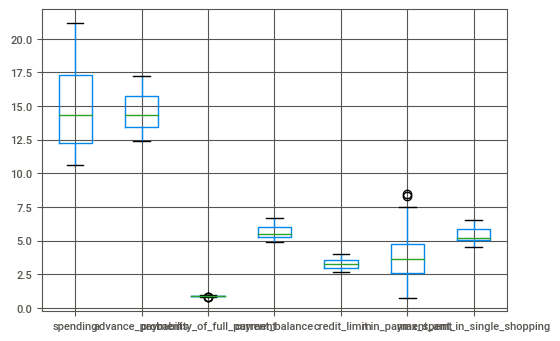

In [280]:
bank_df.boxplot()

##  1.2 Do you think scaling is necessary for clustering in this case? Justify

### Yes . Scaling is required . The data set cointains diffrent range of values . .Clustering uses some sort of distance measure ( ex :euclidean distance)  to determine if data belong to particular class  .So if there is a diffrence in  range of values of data between variables It will affect the clustering determination as Higher weitage variable  may get more preference .So scaling is required in  clustering . In this data also we neeed to do clustering cos there are diffrence in range of values between columns .For example spending mean is 14.8 whreas probability of full payment mean is 0.8709 

In [281]:
bank_scale=bank_df.apply(zscore)
bank_scale.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [282]:
wardlink = linkage(bank_scale, method = 'ward')

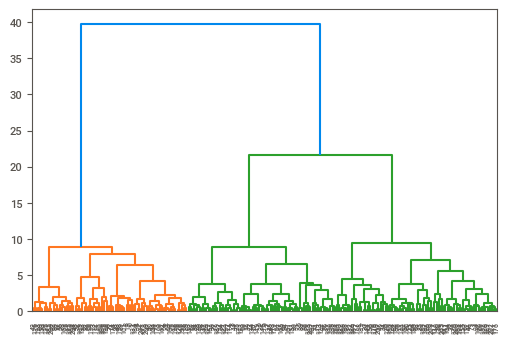

In [283]:
dend = dendrogram(wardlink)

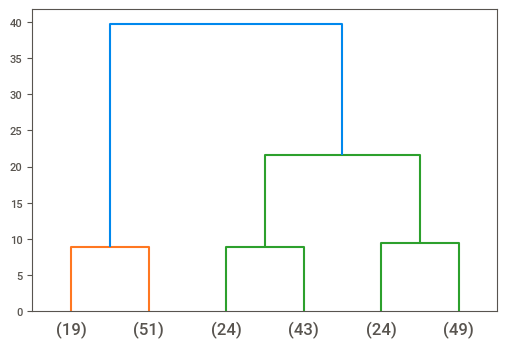

In [284]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p =6,
                 )

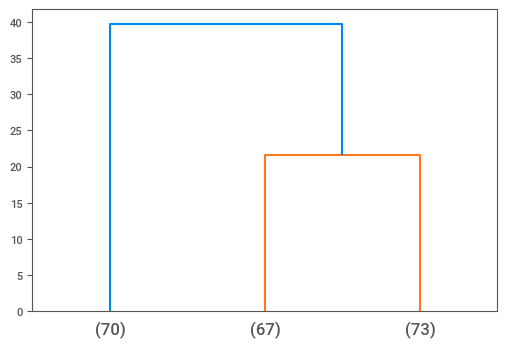

In [285]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p =3,
                 )

In [287]:


clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [288]:
hierarchicaldata= bank_df.copy()

In [289]:
hierarchicaldata['cluster']=clusters
hierarchicaldata.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2


In [290]:

hclustr=hierarchicaldata.groupby('cluster').describe().T
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(hclustr)





cluster                                     1           2
spending                     count  70.000000  140.000000
                             mean   18.371429   13.085571
                             std     1.381233    1.550003
                             min    15.380000   10.590000
                             25%    17.330000   11.817500
                             50%    18.720000   12.770000
                             75%    19.137500   14.347500
                             max    21.180000   16.630000
advance_payments             count  70.000000  140.000000
                             mean   16.145429   13.766214
                             std     0.599277    0.696916
                             min    14.860000   12.410000
                             25%    15.737500   13.207500
                             50%    16.210000   13.665000
                             75%    16.557500   14.305000
                             max    17.250000   15.460000
probability_of

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [238]:
wss =[] 

In [239]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_scale)
    wss.append(KM.inertia_)

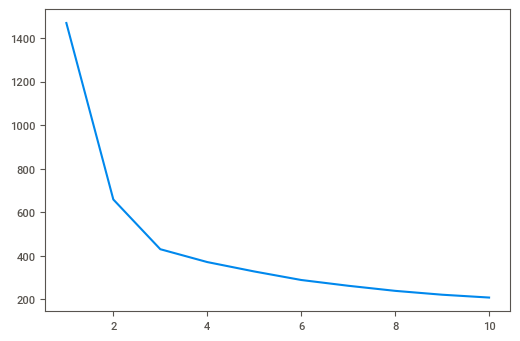

In [240]:
plt.plot(range(1,11), wss)

In [295]:
k_means = KMeans(n_clusters = 3)
k_means.fit(bank_scale)
labels = k_means.labels_


In [293]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(bank_scale)
k_means2.inertia_

659.171754487041

In [294]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(bank_scale)
k_means4.inertia_

371.65314399951626

In [300]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(bank_scale)
k_means5.inertia_

326.22891682972653

In [242]:
interia= k_means.inertia_
interia

430.6589731513006

In [243]:
kmeansdata= bank_df.copy()

In [296]:
bank_df["Clus_kmeans"] = labels
bank_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [297]:
silhouette_score(bank_scale,labels)

0.4007270552751299

In [298]:
sil_width = silhouette_samples(bank_scale,labels)

In [299]:
kmeansdata["sil_width"] = sil_width
kmeansdata.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [248]:
dataprofile=kmeansdata.groupby('Clus_kmeans').describe().T
dataprofile

Clus_kmeans              0          1          2
spending  count  72.000000  67.000000  71.000000
          mean   11.856944  18.495373  14.437887
          std     0.714801   1.277122   1.056513
          min    10.590000  15.560000  12.080000
          25%    11.255000  17.590000  13.820000
...                    ...        ...        ...
sil_width min     0.002713   0.029792   0.005457
          25%     0.314599   0.419827   0.234095
          50%     0.453462   0.523482   0.371077
          75%     0.515146   0.574340   0.479615
          max     0.587277   0.639285   0.554103

[64 rows x 3 columns]

## 1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ).

In [131]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dataprofile)

Clus_kmeans                                 0          1          2
spending                     count  72.000000  67.000000  71.000000
                             mean   11.856944  18.495373  14.437887
                             std     0.714801   1.277122   1.056513
                             min    10.590000  15.560000  12.080000
                             25%    11.255000  17.590000  13.820000
                             50%    11.825000  18.750000  14.430000
                             75%    12.395000  19.145000  15.260000
                             max    13.340000  21.180000  16.440000
advance_payments             count  72.000000  67.000000  71.000000
                             mean   13.247778  16.203433  14.337746
                             std     0.355208   0.546439   0.525706
                             min    12.410000  14.890000  13.150000
                             25%    12.992500  15.855000  14.030000
                             50%    13.250000  1

# Problem 2

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Basis on these predictions, what are the business insights and recommendations

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [152]:
insurance_df = pd.read_csv("insurance_part2_data.csv")

In [110]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [111]:
insurance_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [112]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [113]:
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [7]:
insurancereport= sv.analyze(insurance_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [8]:
irh=insurancereport.show_html('insurance claim report.html')
irh

Report insurance claim report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [114]:
 print("Number of Duplicates ",insurance_df.duplicated().sum())

Number of Duplicates  139


In [153]:
print("Removing duplicates")

insurance_df=insurance_df.drop_duplicates( keep='last')

insurance_df.info()

Removing duplicates
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


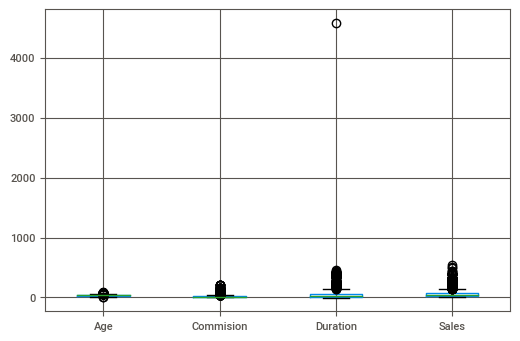

In [116]:
boxplot = insurance_df.boxplot()

In [154]:
# outlier

from scipy import stats

numeric_cols = insurance_df.select_dtypes(include=[np.number]).columns



z=np.abs(stats.zscore(insurance_df[numeric_cols]))

listin= np.where(z>3)


outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )






the number of outliers are  290


In [155]:
print("replace outliers")

def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


insurance_df[numeric_cols]=insurance_df[numeric_cols].apply(outlier)
insurance_df.head()



replace outliers


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA
5,45.0,JZI,Airlines,Yes,15.75,Online,8.0,45.00,Bronze Plan,ASIA


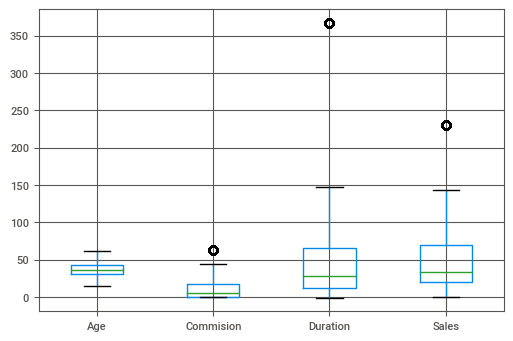

In [119]:


boxplot = insurance_df.boxplot()

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [156]:
insurance= insurance_df.copy()

In [157]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object':
        insurance[feature] = pd.Categorical(insurance[feature]).codes 

In [122]:
 insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,1,15.75,1,8.0,45.00,0,0


In [123]:
insurance['Claimed'].sum()

914

In [158]:
X = insurance.copy()

X =X.drop("Claimed" , axis=1)

y = insurance.copy()
y = y.pop("Claimed")


In [125]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,15.75,1,8.0,45.00,0,0


In [126]:
y.head()

0    0
2    0
3    0
4    0
5    1
Name: Claimed, dtype: int8

In [159]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [128]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1347,21.0,3,0,11.55,1,65.0,33.0,0,0
2362,35.0,0,0,15.60,1,22.0,39.0,0,0
947,39.0,0,0,63.21,1,367.0,230.0,4,0
218,51.0,0,0,63.21,1,367.0,230.0,4,0
2340,28.0,2,1,0.00,1,3.0,10.0,1,0


In [129]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
684,19.0,0,0,6.00,1,12.0,15.0,0,0
231,27.0,1,1,17.82,1,16.0,29.7,2,1
1729,27.0,0,0,63.21,1,367.0,230.0,4,0
1005,36.0,2,1,0.00,1,5.0,73.0,1,0
848,58.0,0,0,5.25,1,51.0,21.0,0,0


In [130]:
train_labels.head()

1347    0
2362    0
947     1
218     1
2340    0
Name: Claimed, dtype: int8

In [131]:
test_labels.head()

684     0
231     0
1729    0
1005    0
848     1
Name: Claimed, dtype: int8

## Decision Tree Classifier

In [132]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [133]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [134]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('insurancetree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [20, 25, 30],
    'min_samples_split': [80, 100, 120]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 4)

In [136]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [80, 100, 120]})

In [137]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 100}

In [138]:
dtbest_grid = grid_search.best_estimator_
dtbest_grid

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=100)

In [139]:

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('insurancetree.dot','w')
dot_data = tree.export_graphviz(dtbest_grid, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

In [186]:
dtytrain_predict = dtbest_grid.predict(X_train)
dtytest_predict = dtbest_grid.predict(X_test)

In [187]:
print(classification_report(train_labels,dtytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1347
           1       0.67      0.58      0.62       655

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [188]:
print(classification_report(test_labels,dtytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       600
           1       0.62      0.60      0.61       259

    accuracy                           0.77       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.77      0.77      0.77       859



## Random Forest Classifier

In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,5,6,7],
    'min_samples_leaf': [20, 25,30],
    'min_samples_split': [80,100,120],
    'n_estimators': [ 101, 201]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)



In [178]:
grid_search.fit(X_train, train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 6, 7],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [80, 100, 120],
                         'n_estimators': [101, 201]})

In [179]:
grid_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 80,
 'n_estimators': 101}

In [176]:
rfcbest_grid = grid_search.best_estimator_
rfcbest_grid 

RandomForestClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=80,
                       n_estimators=101)

In [191]:
rfcytrain_predict = rfcbest_grid.predict(X_train)
rfcytest_predict = rfcbest_grid.predict(X_test)

In [192]:
print(classification_report(train_labels,rfcytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1347
           1       0.71      0.59      0.65       655

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [193]:
print(classification_report(test_labels,rfcytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       600
           1       0.63      0.62      0.63       259

    accuracy                           0.78       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.77      0.78      0.77       859



## MLP Classifier (Artificial Neural Network)

In [180]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [181]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100),(200,200,200),(300,300,300)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000,5000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [182]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (200, 200, 200),
                                                (300, 300, 300)],
                         'max_iter': [10000, 5000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [183]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (200, 200, 200),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [185]:
anbest_grid = grid_search.best_estimator_
anbest_grid

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=10000, tol=0.1)

In [194]:
anytrain_predict = anbest_grid.predict(X_trains)
anytest_predict = anbest_grid.predict(X_tests)

In [195]:
print(classification_report(train_labels,anytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1347
           1       0.66      0.61      0.63       655

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002



In [196]:
print(classification_report(test_labels,anytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       600
           1       0.62      0.64      0.63       259

    accuracy                           0.77       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

### CART decision tree

In [197]:
dtbest_grid.score(X_train,train_labels)

0.7707292707292708

In [198]:
dtbest_grid.score(X_test,test_labels)

0.7671711292200233

In [201]:
confusion_matrix(train_labels, dtytrain_predict)

array([[1164,  183],
       [ 276,  379]], dtype=int64)

In [202]:
confusion_matrix(test_labels,dtytest_predict)

array([[503,  97],
       [103, 156]], dtype=int64)

AUC: 0.8007.


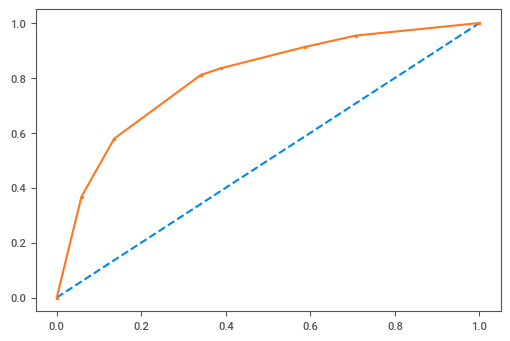

In [203]:
# AUC and ROC for the training data

# predict probabilities
probs = dtbest_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.4f.' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.7869


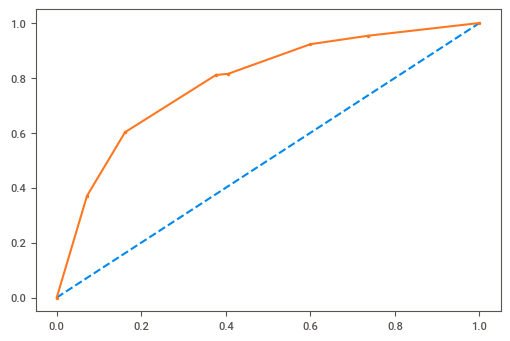

In [204]:
# AUC and ROC for the test data


# predict probabilities
probs = dtbest_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Random Forest Classifier

In [205]:
rfcbest_grid.score(X_train,train_labels)

0.7867132867132867

In [206]:
rfcbest_grid.score(X_test,test_labels)

0.7753201396973225

In [209]:
confusion_matrix(train_labels, rfcytrain_predict)

array([[1187,  160],
       [ 267,  388]], dtype=int64)

In [210]:
confusion_matrix(test_labels,rfcytest_predict)

array([[505,  95],
       [ 98, 161]], dtype=int64)

AUC: 0.8280.


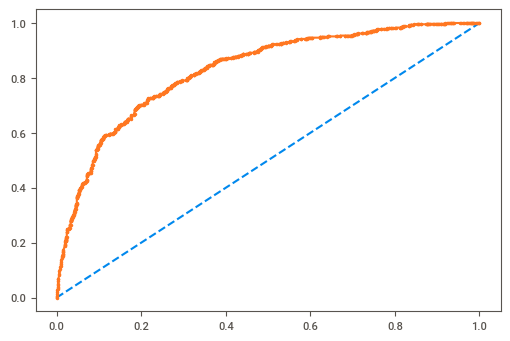

In [211]:
# AUC and ROC for the training data

# predict probabilities
probs =rfcbest_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.4f.' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.8011


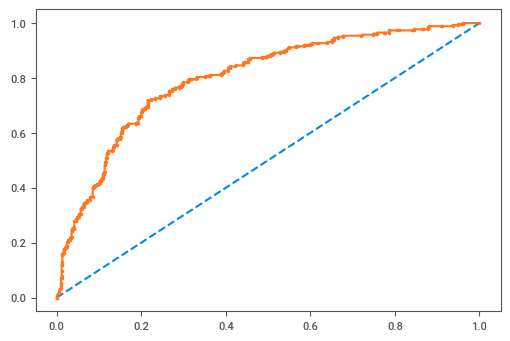

In [212]:
# AUC and ROC for the test data


# predict probabilities
probs = rfcbest_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### MLP Classifier (Artificial Neural Network)

In [213]:
anbest_grid.score(X_trains,train_labels)

0.7697302697302697

In [214]:
anbest_grid.score(X_tests,test_labels)

0.7718277066356228

In [217]:
confusion_matrix(train_labels, anytrain_predict)

array([[1144,  203],
       [ 258,  397]], dtype=int64)

In [218]:
confusion_matrix(test_labels,anytest_predict)

array([[498, 102],
       [ 94, 165]], dtype=int64)

AUC: 0.8202.


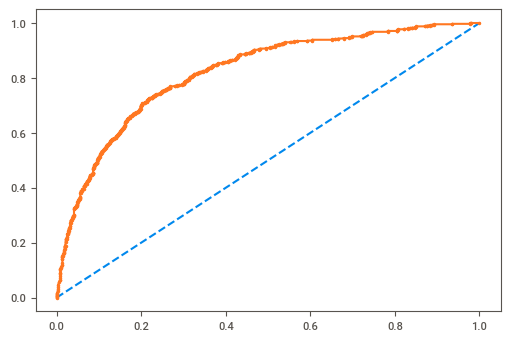

In [219]:
# AUC and ROC for the training data

# predict probabilities
probs =anbest_grid.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.4f.' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.8000


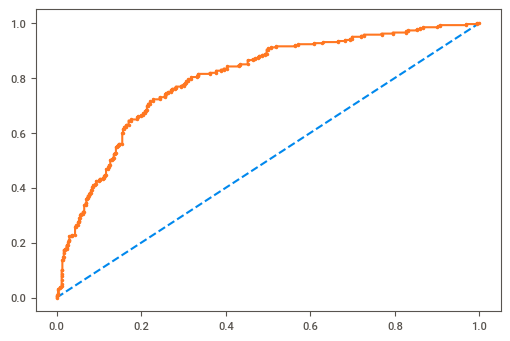

In [220]:
# AUC and ROC for the test data


# predict probabilities
probs = anbest_grid.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 2.4  Final Model: Compare all the model and write an inference which model is best/optimized.

In [223]:
#DECISION TREE 

In [224]:
print(classification_report(train_labels,dtytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1347
           1       0.67      0.58      0.62       655

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [225]:
print(classification_report(test_labels,dtytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       600
           1       0.62      0.60      0.61       259

    accuracy                           0.77       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.77      0.77      0.77       859



In [226]:
#Random forest 

In [227]:
print(classification_report(train_labels,rfcytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1347
           1       0.71      0.59      0.65       655

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [228]:
print(classification_report(test_labels,rfcytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       600
           1       0.63      0.62      0.63       259

    accuracy                           0.78       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.77      0.78      0.77       859



In [229]:
## ANN

In [230]:
print(classification_report(train_labels,anytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1347
           1       0.66      0.61      0.63       655

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002



In [231]:
print(classification_report(test_labels,anytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       600
           1       0.62      0.64      0.63       259

    accuracy                           0.77       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



In [ ]:
## ANN IS BEST 

## 2.5   Inference: Basis on these predictions, what are the business insights and recommendations

In [ ]:
# RECOMMENDED ANN MODEL 